In [1991]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [1992]:
titanic = pd.read_csv('titanic.csv')
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [1993]:
titanic.drop(['Name', 'Ticket'], axis=1, inplace=True)
titanic

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,71.2833,C85,C
2,3,1,3,female,26.0,0,0,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,53.1000,C123,S
4,5,0,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,NaN,S
887,888,1,1,female,19.0,0,0,30.0000,B42,S
888,889,0,3,female,NaN,1,2,23.4500,NaN,S
889,890,1,1,male,26.0,0,0,30.0000,C148,C


In [1994]:
titanic['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [1995]:
desv_est_age_male = titanic.loc[titanic['Age'] < 18, 'Age'].std()
prom_age_male = titanic['Age'].mean()
min = titanic['Age'].min()
max = titanic['Age'].max()
moda = titanic['Age'].mode()[0]
repeticiones = titanic['Age'].value_counts()[moda]
num_edades = titanic['Age'].count()

print("La desviación estandar es",desv_est_age_male)
print("El promedio de edad es",prom_age_male)
print("La edad minima es",min)
print("La edad maxima es",max)
print("La moda es",moda)
print("El numero de repeticiones de la moda es",repeticiones)
print("El numero de edades es",num_edades)


La desviación estandar es 6.030407695354197
El promedio de edad es 29.69911764705882
La edad minima es 0.42
La edad maxima es 80.0
La moda es 24.0
El numero de repeticiones de la moda es 30
El numero de edades es 714


In [1996]:
# reemplazar con la moda las edades faltantes
titanic['Age'].fillna(moda, inplace=True)
titanic

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_12620\3579632780.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['Age'].fillna(moda, inplace=True)


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,71.2833,C85,C
2,3,1,3,female,26.0,0,0,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,53.1000,C123,S
4,5,0,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,NaN,S
887,888,1,1,female,19.0,0,0,30.0000,B42,S
888,889,0,3,female,24.0,1,2,23.4500,NaN,S
889,890,1,1,male,26.0,0,0,30.0000,C148,C


In [1997]:
survived = titanic.pop('Survived')
titanic['Survived'] = survived
titanic

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Survived
0,1,3,male,22.0,1,0,7.2500,NaN,S,0
1,2,1,female,38.0,1,0,71.2833,C85,C,1
2,3,3,female,26.0,0,0,7.9250,NaN,S,1
3,4,1,female,35.0,1,0,53.1000,C123,S,1
4,5,3,male,35.0,0,0,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...
886,887,2,male,27.0,0,0,13.0000,NaN,S,0
887,888,1,female,19.0,0,0,30.0000,B42,S,1
888,889,3,female,24.0,1,2,23.4500,NaN,S,0
889,890,1,male,26.0,0,0,30.0000,C148,C,1


In [1998]:
titanic['Sex'] = titanic['Sex'].replace({'male': 0, 'female': 1})
titanic['Embarked'].value_counts()
titanic['Embarked'] = titanic['Embarked'].replace({'S': 0, 'C': 1, 'Q': 2})
titanic['Cabin'].value_counts()

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_12620\273405191.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  titanic['Sex'] = titanic['Sex'].replace({'male': 0, 'female': 1})
C:\Users\USUARIO\AppData\Local\Temp\ipykernel_12620\273405191.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  titanic['Embarked'] = titanic['Embarked'].replace({'S': 0, 'C': 1, 'Q': 2})


Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

In [1999]:
print("El numero de valores nulos en la columna Cabin es",titanic['Cabin'].isnull().sum())
moda_cabin = titanic['Cabin'].mode()[0]
print("La moda de la columna Cabin es",moda_cabin)
titanic['Cabin'].fillna(moda_cabin, inplace=True)
titanic.isnull().sum()
titanic.dropna(inplace=True)
titanic.isnull().sum()
titanic.drop(['PassengerId'], axis=1, inplace=True)
titanic


El numero de valores nulos en la columna Cabin es 687
La moda de la columna Cabin es B96 B98


C:\Users\USUARIO\AppData\Local\Temp\ipykernel_12620\3866086020.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['Cabin'].fillna(moda_cabin, inplace=True)


,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Survived
0,3,0,22.0,1,0,7.2500,B96 B98,0.0,0
1,1,1,38.0,1,0,71.2833,C85,1.0,1
2,3,1,26.0,0,0,7.9250,B96 B98,0.0,1
3,1,1,35.0,1,0,53.1000,C123,0.0,1
4,3,0,35.0,0,0,8.0500,B96 B98,0.0,0
...,...,...,...,...,...,...,...,...,...
886,2,0,27.0,0,0,13.0000,B96 B98,0.0,0
887,1,1,19.0,0,0,30.0000,B42,0.0,1
888,3,1,24.0,1,2,23.4500,B96 B98,0.0,0
889,1,0,26.0,0,0,30.0000,C148,1.0,1


In [2000]:
cabina = {valor: i for i, valor in enumerate(titanic['Cabin'].unique(), start=1)}
titanic['Cabin'] = titanic['Cabin'].replace(cabina)
#SibSp: Número de hermanos / cónyuges a bordo
#Parch: Número de padres / hijos a bordo
titanic['Family_Size'] = titanic['SibSp'] + titanic['Parch'] + 1
titanic

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_12620\3879423967.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  titanic['Cabin'] = titanic['Cabin'].replace(cabina)


,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Survived,Family_Size
0,3,0,22.0,1,0,7.2500,1,0.0,0,2
1,1,1,38.0,1,0,71.2833,2,1.0,1,2
2,3,1,26.0,0,0,7.9250,1,0.0,1,1
3,1,1,35.0,1,0,53.1000,3,0.0,1,2
4,3,0,35.0,0,0,8.0500,1,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,2,0,27.0,0,0,13.0000,1,0.0,0,1
887,1,1,19.0,0,0,30.0000,145,0.0,1,1
888,3,1,24.0,1,2,23.4500,1,0.0,0,4
889,1,0,26.0,0,0,30.0000,146,1.0,1,1


In [2001]:
X = titanic.iloc[:, :-1].values
y = titanic.iloc[:, -1].values
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(622, 9)
(267, 9)
(622,)
(267,)


In [2002]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy_score(y_test, y_pred)

0.7191011235955056

In [2003]:
mlp = MLPClassifier(hidden_layer_sizes=(9,9,), max_iter=1500, solver='adam', random_state=42)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

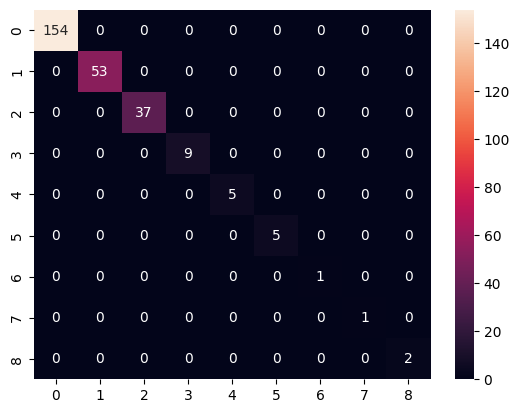

In [2004]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")
plt.show()
